In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [33]:
data = pd.read_excel('Raw_data/registrations.xlsx')

In [6]:
des_list = ['Data Scientist','Data Analyst','Business Analyst','Analyst','Programmer Analyst','Senior Analyst','Machine Learning Engineer','Assosiate Data Scientist','Data Engineer','Data Science Intern','Technology Analyst','Senior Business Analyst','Machine Learning Intern','Senior Data Scientist','data scientist']

In [20]:
data_des = data[data['Designation'].isin(des_list)]

In [8]:
data_des.Designation.value_counts()

Data Scientist               344
Data Analyst                 115
Business Analyst              47
Analyst                       43
Programmer Analyst            39
Senior Analyst                29
Machine Learning Engineer     24
Data Engineer                 20
Data Science Intern           18
Technology Analyst            16
Senior Business Analyst       16
Machine Learning Intern       15
Senior Data Scientist         14
data scientist                11
Name: Designation, dtype: int64

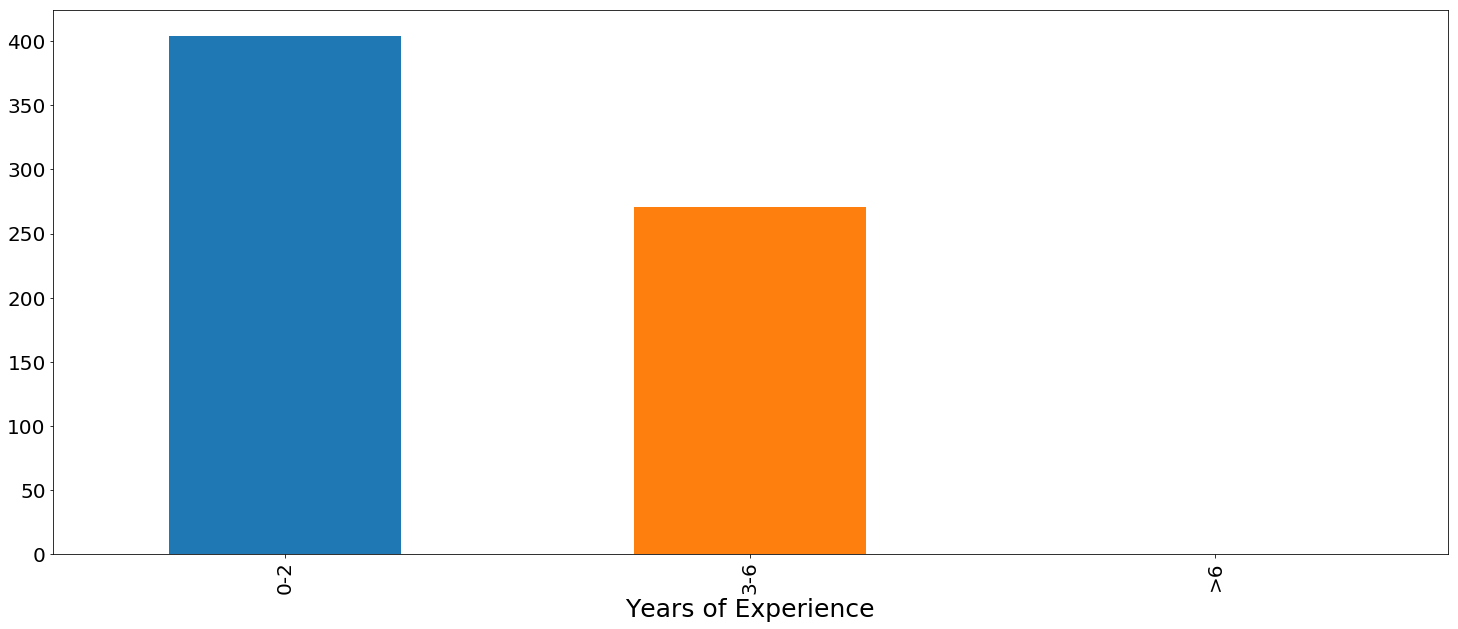

In [14]:
yoe = data_des[np.abs(data_des['Years of Experience']-data_des['Years of Experience'].mean())<=(data_des['Years of Experience'].std())]
elt = pd.cut(yoe['Years of Experience'], bins=[-1,2,6,100], labels=['0-2','3-6','>6'])
elt.value_counts().plot(kind='bar',figsize=(25,10), fontsize=20)
plt.xlabel('Years of Experience',fontsize=25)
plt.show()

In [34]:
elt.value_counts()

0-2    404
3-6    271
>6       0
Name: Years of Experience, dtype: int64

In [15]:
kar=[]
country_names = pd.read_excel('country_names.xlsx')
c_name = country_names['Name'].str.lower().tolist()
country = data['Location'].str.lower()
country = country.str.split(',')
ar = country.dropna()
hy = ar.reset_index(drop=True)
for i in range(len(hy)):
    temp = hy[i][-1]
    kar.append(temp)
kar = [x.strip() for x in kar]
kar=list(set(kar))
kar = list(set(kar).intersection(c_name))

C:\Users\Abhishikth\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Abhishikth\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Abhishikth\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

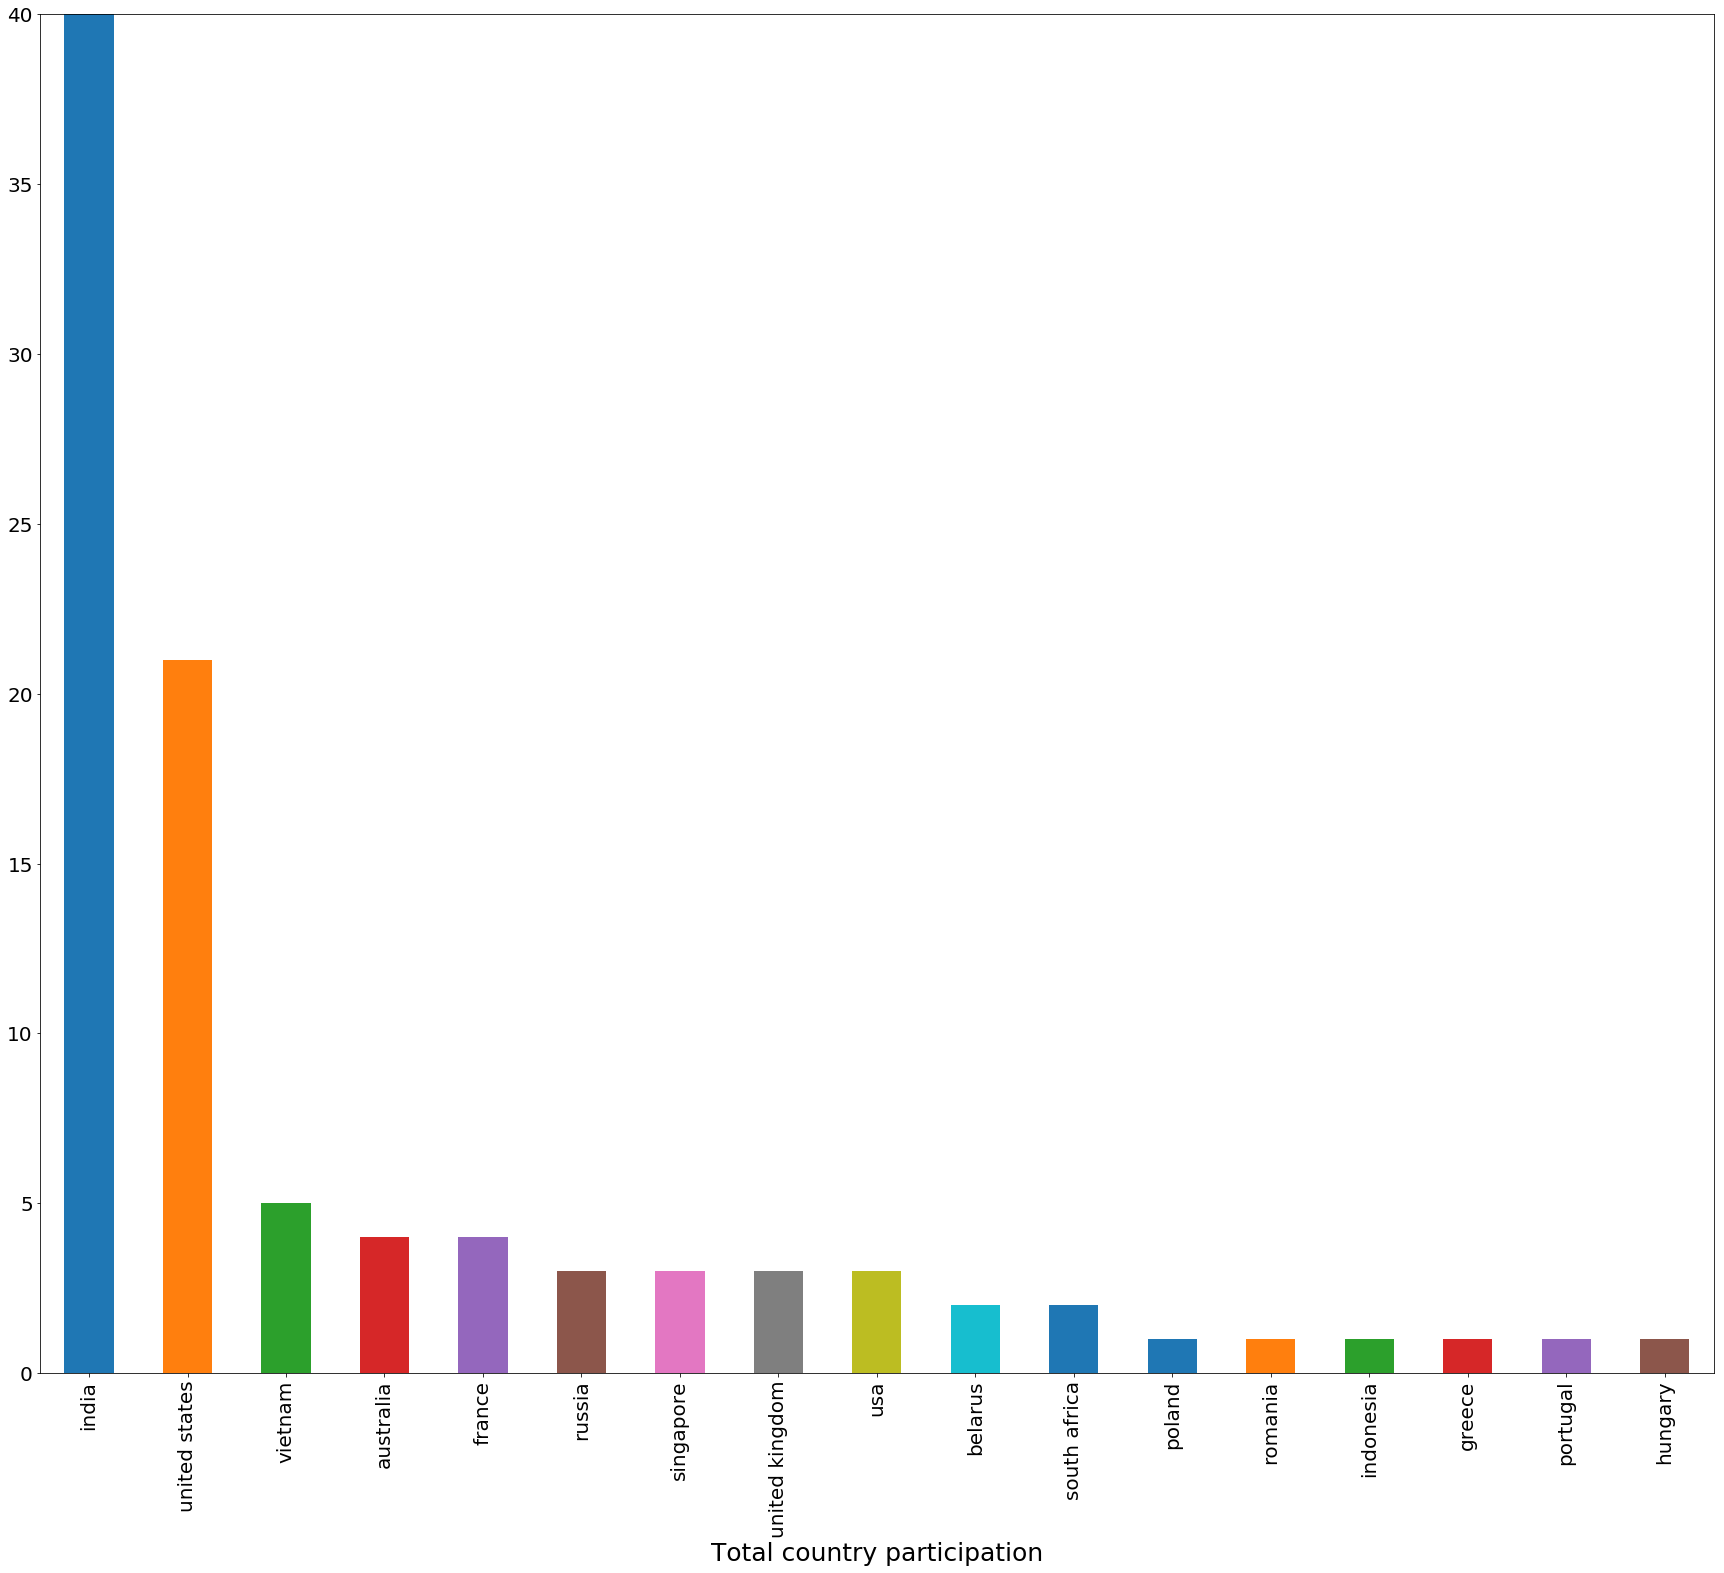

In [23]:
data_des['Location'] = data_des['Location'].map(lambda x: str(x))
data_des['country'] = data_des['Location'].map(lambda x: x.split(',')[-1])
data_des['country'] = data_des['country'].map(lambda x: x.strip().lower())
data2 = data_des.loc[data['country'].isin(kar),:]
data2['country'].value_counts().plot(kind='bar', figsize=(30,25), ylim=(0,40), fontsize=20)
plt.xlabel('Total country participation',fontsize=25)
plt.show()

In [25]:
data2.country.value_counts()

india             549
united states      21
vietnam             5
australia           4
france              4
russia              3
singapore           3
united kingdom      3
usa                 3
belarus             2
south africa        2
poland              1
romania             1
indonesia           1
greece              1
portugal            1
hungary             1
Name: country, dtype: int64

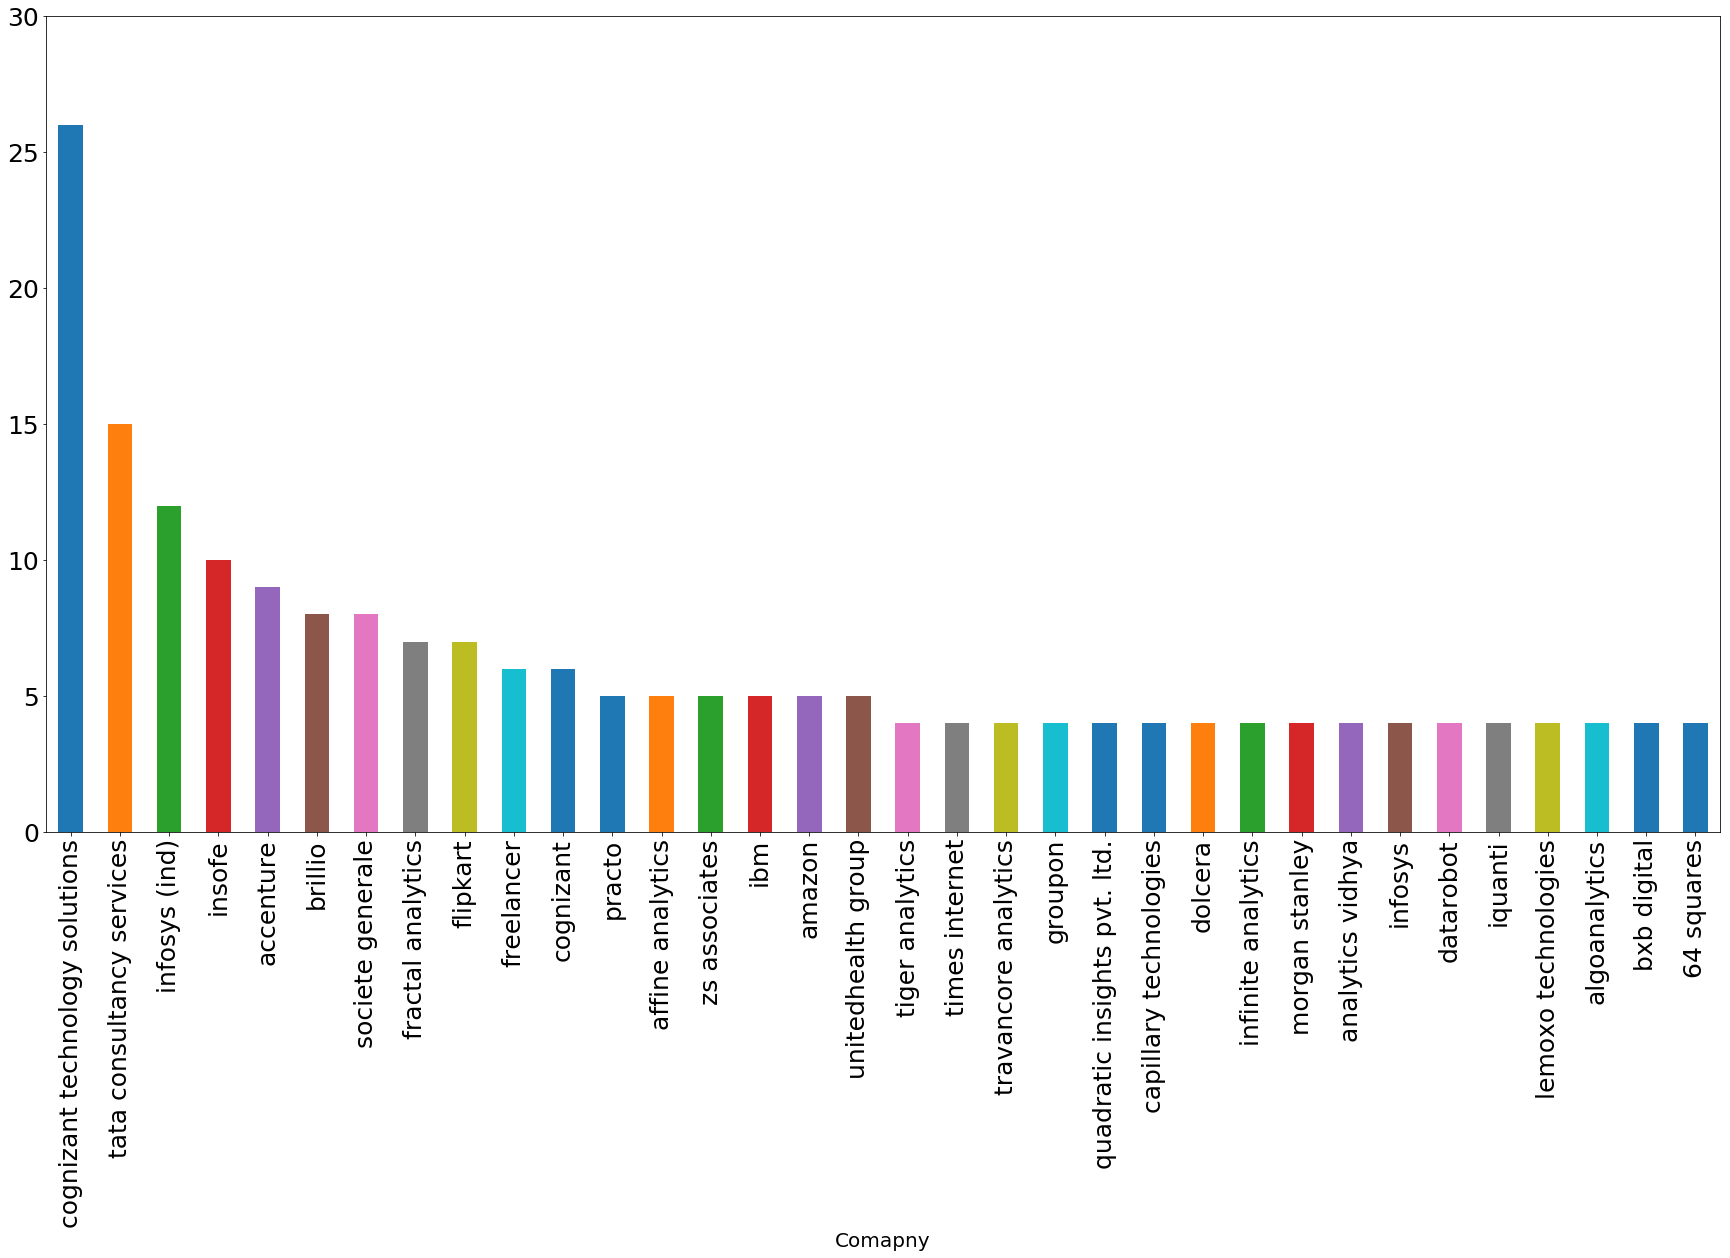

In [31]:
company = data_des['Company'].str.lower()
company = company.groupby(company).filter(lambda x: len(x) > 3)
company.value_counts().plot(kind='bar',figsize=(30,15),ylim=(0,30), fontsize=25)
plt.xlabel('Comapny',fontsize=20)
plt.show()

In [32]:
company.value_counts()

cognizant technology solutions    26
tata consultancy services         15
infosys (ind)                     12
insofe                            10
accenture                          9
brillio                            8
societe generale                   8
fractal analytics                  7
flipkart                           7
freelancer                         6
cognizant                          6
practo                             5
affine analytics                   5
zs associates                      5
ibm                                5
amazon                             5
unitedhealth group                 5
tiger analytics                    4
times internet                     4
travancore analytics               4
groupon                            4
quadratic insights pvt. ltd.       4
capillary technologies             4
dolcera                            4
infinite analytics                 4
morgan stanley                     4
analytics vidhya                   4
i